# REI201G Hópverkefni

Í þessu verkefni mega nemendur vinna í hópum, **allt að þrír í hóp**. Merkið lausnina með nöfnum allra í hópnum og skilið einni hóplausn á Gradescope. Þetta verkefni er umfangsmeira en heimaverkefnin og því er nauðsynlegt að byrja snemma.

**Skilafrestur** er til föstudagsins 20. apríl, kl. 23:59.

Þið skilið Jupyter vinnubók sem inniheldur allan kóða sem notaður er til að leysa verkefnið ásamt útskýringum. Gefið verður sérstaklega fyrir hversu auðvelt er að fylgja kóðanum og hversu læsileg vinnubókin er. Óþarfi er að láta lýsingu á dæmum fylgja. Athugið að minnstu fervika verkefni er hægt að leysa með `np.linalg.lstsq` fallinu í NumPy.

1\. [Flokkun á textaskjölum, 20 stig] Í þessu verkefni er unnið með gögn um tíðni orða í textaskjölum (unnið var með hliðstæð gögn í heimaverkefni 3.4). Fylki $X$ geymir hversu oft 1000 mismunandi orð á borð við `Griffyndor`, `football` og `school` koma fyrir í 600 skjölum. Búið er að flokka öll skjölin í einn af þremur eftirfarandi flokkum: íþróttir (1), menntun (2) og Harry Potter (3). Merkingarnar eru geymdar í 600-vigrinum $y$.

Þið eigið að útbúa minnstu kvaðrata flokkara sem spáir fyrir um hvort tiltekinn textabútur (í formi vigurs $x$ sem geymir hversu oft orðin 1000 koma fyrir) fjalli um íþróttir eða ekki. Flokkarinn er á forminu $\hat{y} = \textrm{sign}(\tilde{y}(x))$ þar sem $\tilde{y}(x)=w^T x + v$ fæst með minnstu kvaðrata aðhvarfsgreiningu.

Lesið gögnin inn og skiptið upp í þjálfunar- og prófunargögn með eftirfarandi kóða:

In [56]:
import numpy as np

data=np.load('docmatrix.npz')
X=data['X']
y=data['y']
terms=data['terms']
y[y==3]=-1
y[y==2]=-1
# Skipta í gögnum í þjálfunar- og prófunargögn
n=X.shape[0]
rnd=np.random.permutation(n) # Slembin umröðun talnanna 1,...,n
nfrac=0.7 # Hlutfall gagna sem er notað til þjálfunar
n_train=int(nfrac*n)
x_train=X[rnd[0:n_train],:]
y_train=y[rnd[0:n_train]]
n_test=int(0.3*n)
x_test=X[rnd[n_train:],:]
y_test=y[rnd[n_train:]]

N = X.shape[0]
A = np.c_[np.ones(n_train), x_train]
theta,res,rank,_ = np.linalg.lstsq(A, y_train, rcond=False)
print("theta:", theta) # Ekki sömu gildi og í bók

# Spá
ypred=np.sign(np.dot(A,theta))
print(np.sum(y_train != ypred)/n_train)
print(rms(ypred))

A = np.c_[np.ones(n_test), x_test]
theta,res,rank,_ = np.linalg.lstsq(A, y_test, rcond=False)
print("theta:", theta) # Ekki sömu gildi og í bók
# Spá
ypred=np.sign(np.dot(A,theta))

print(np.sum(y_train != ypred)/n_test)

def rms(u):
    return np.linalg.norm(u)/np.sqrt(len(u))



('theta:', array([-0.08239311, -0.02566817, -0.02006625, ..., -0.01392736,
       -0.01313387, -0.02502552]))
0
1.0
('theta:', array([-0.04389191, -0.02876999, -0.00738857, ..., -0.00308611,
       -0.02431936, -0.02834861]))
0
1.0
[-1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
  1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.
 -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.
  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.
  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


a) Sameinið flokka 2 og 3 og útbúið minnstu kvaðrata flokkara út frá þjálfunargögnum. Metið skekkju flokkarans á þjálfunargögnum annars vegar og prófunargögnum hins vegar (e. training set error, test set error).

b) Hvaða orð hafa mest áhrif á flokkunina? (Sýnið 10 orð eða þar um bil, gætið þess að taka tillit til fastans $v$).

2\. [Flokkun á handskrifuðum tölustöfum, 50 stig] Í þessu verkefni á að flokka myndir af handskrifuðum tölustöfum. Gögnin koma úr gagnasafni sem kallast MNIST og þau samanstanda af $28 \times 28$ punkta myndum sem búið er að breyta í 784-vigra. Hver vigur er merktur með tölu, 0, 1, ..., 9 ($K=10$ flokkar). Markmiðið er að búa til flokkara (reglu) $\hat{f}$ sem tekur mynd á vigurformi sem inntak og skilar tölu á bilinu 0 til 9 (sem helst ætti að vera rétt). Gögnunum er skipt í þjálfunargögn (10000 stök) og prófunargögn (1000 stök) sem þið notið til að þjálfa flokkarann annnars vegar og meta hversu góður hann er hins vegar.

Þið sækið MNIST gögnin með

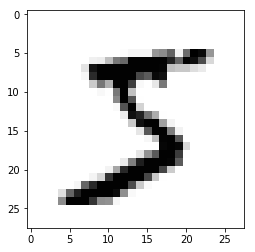

('theta:', array([  1.85431603e+00,   7.39444358e+10,   1.17011122e+11,
        -3.45692633e+10,   5.27532302e+10,   4.11900494e+10,
         6.20077513e+09,   9.29534343e+10,   9.24622982e+10,
        -6.60961703e+10,   7.97060216e+10,  -3.50794951e+10,
        -1.04691087e+10,   1.13655340e+11,   1.46472924e+11,
        -2.25171542e+11,  -3.73975041e+10,   4.05252158e+10,
        -1.44322212e+10,  -6.80760077e+09,  -1.83717395e+10,
         6.08266661e+10,   9.41931590e+08,   3.10221649e+10,
         5.05688423e+10,   1.40367632e+10,   1.94280114e+10,
        -1.25975524e+10,  -2.00747809e+10,   6.90906414e+10,
         2.03938467e+10,   3.29446456e+10,  -1.54180928e+10,
        -1.53261411e+10,   2.95545246e+10,  -1.61629282e+10,
         2.75462712e+10,   2.69315846e+10,   8.07943541e+08,
        -4.68895805e+07,   1.68704987e-02,   1.36254600e+10,
         1.96413729e+10,  -3.23220635e+09,   3.92489882e+09,
         1.75751827e+10,   3.53125790e+10,   3.85948351e+10,
         1.68

TypeError: float() argument must be a string or a number

In [83]:
import numpy as np

data=np.load('mnist_small.npz')
x_train=data['x_train']
y_train=data['y_train']
x_test=data['x_test']
y_test=data['y_test']
n_train = len(y_train)
n_test = len(y_test)

import matplotlib.pyplot as plt
plt.imshow(x_train[0,:].reshape(28,28),cmap='Greys') # Fyrsta myndin í þjálfunargögnunum
plt.show()


def tag(y):
    count = 0
    for i in range(0,9):
        count += 1
        y[count==y]=1
    return y

count = 0

def rms(u):
    return np.linalg.norm(u)/np.sqrt(len(u))

for i in range(0, 9):
    count += 1
    y[count==y]=-1
    y = tag(y)
    A = np.c_[np.ones(n_test), x_test]
    theta,res,rank,_ = np.linalg.lstsq(A, y_test, rcond=False)
    # print("theta:", theta) # Ekki sömu gildi og í bók
    # Spá
    ypred=np.sign(np.dot(A,theta))
    #print(np.sum(y != ypred)/n_test)
    print(rms(x))
    



a) [20 stig] Þjálfið 10 tvíþátta flokkara (e. binary classifier) $\hat{f}_k, ~i = 0,\ldots,9$ sem eru þannig að $\hat{f}_k$ greinir flokk $k$ frá öllum öðrum (sbr. dæmi 1 hér á undan) og mælið villutíðni á prófunargögnum fyrir hvern og einn flokkara. 

Myndið einn fjölþátta flokkara $\hat{f}$ með því að taka stærsta $\tilde{f}_k$ gildið sem niðurstöðu (sjá grein 14.3.1 í bók). Mælið villutíðni fyrir þann flokkara, bæði á þjálfunar og prófunargögnum. Setjið kóðann ykkar í föll eins og við á. Athugið að í þeim liðum sem á eftir koma skoðið þið eingöngu þjálfunar- og prófunarskekkju fyrir fjölþátta flokkarann.

*Athugasemdir*:

1) Þið getið skoðað gögn myndrænt með
```python
import matplotlib.pyplot as plt
plt.imshow(x_train[0,:].reshape(28,28),cmap='Greys') # Fyrsta myndin í þjálfunargögnunum
plt.show()
```

2) Notið $K \times (p+1)$ fylki til að halda utan um vogtölur fyrir alla $K=10$ flokkarana (lína $i$ svarar til flokkara $i$).

3) Brjótið verkefnið niður í viðráðanlegar einingar, útfærið t.d. fyrst flokkara fyrir $K=3$ og síðan fyrir $K=10$.


b) [5 stig] Skrifið fall sem reiknar ruglingsfylki (e. confusion matrix) og sýnið ruglingsfyki fyrir þjálfunar- og prófunargögn. Eru niðurstöður ykkar nokkurn veginn í samræmi við töflur 14.11 og 14.12 í bók? (að teknu tilliti til þess að töflur í bók byggja á stærra gagnasafni og aðeins smærri bitmap-myndum).

c) [10 stig] Í þessum lið á að framkvæma svokallað "feature engineering" (fremst í grein 13.3) með því að bæta við nýjum breytum. Við fáum þannig nýtt gagnasafn sem inniheldur allar upphaflegu breyturnar (784 pixel-gildi) og þær nýju að auki. Hér notum við svokallaða "random features" (sjá grein 14.2.2 í bók). Lát $q$ tákna fjölda breyta sem á að bæta við, t.d. $q=1000$.

Fyrir 784-vigur $x$ fást nýju (afleiddu) breyturnar með $\max{((Rx)_j,0)}),~j=1,\ldots,q$ þar sem $R$ er $q \times 784$ fylki með stökum sem valin eru af handahófi, $R_{ij}=\pm 1$. Fyrir hverja mynd í prófunar- og þjálfunargögnum bætið þið við $q$ slíkum slembigögnum, þjálfið flokkara eins og í a) lið og mælið villutíðni á prófunarsafn. Framkvæmið þetta fyrir $q=100,1000, 5000$ og 10000.

*Athugasemdir*:

1) Þið getið notað `np.random.randint` til að útbúa slembinn 0/1 vigur og breytið yfir í $pm~1$ gildi.

2) Þið útbúið eitt $R$-fylki fyrir hvert gildi á $q$ og notið sama fylkið fyrir bæði þjálfunar- og prófunargögn.

3) Þið getið notað `np.maximum` til að framkvæma max-aðgerina.

d) [10 stig] Bætið nú reglunarlið $||w||^2$ við kvaðratskekkjuna (sjá greinar 15.1 og 15.4). Leysið minnstu kvaðrata verkefnið með upphaflegu gögnunum fyrir $\lambda=10^{-2}, 1, 10^2, 10^4,10^6$. Reiknið þjálfunar- og prófunarskekkju í hvert skipti og teiknið graf sem sýnir skekkjur sem fall af $\lambda$. Hvaða ályktanir má draga af grafinu?

e) [5 stig] Hér á að nota bæði reglun og slembnar inntaksbreytur í þeirri viðleitni að auka nákvæmni í flokkun enn frekar. Veljið heppilegt gildi á $\lambda$, bætið við slembnum inntaksbreytum eins og í b) lið og útbúið flokkara. Finnið villutíðni á prófunargögnum. Athugið að þið gætuð þurft að prófa önnur gildi á $\lambda$ en notuð voru í d) lið.